    # ================================================
    # 요구사항
    # ================================================
    # Python을 이용한 유럽 회원국 무역의존도 최근 10년 데이터 분석

    # 데이터 분석 주제: 유럽 회원국 무역의존도 최근 10년 데이터 분석
    # 세부목표1. 유럽 국가별 무역의존도 비교 분석
    # 세부목표2. 유럽 시기별(수출)무역의존도 추이 분석
    # 세부목표3. 유럽 시기별(수입)무역의존도 추이 분석
    #
    # 요청 분석 내용
    # - 데이터 전처리 과정
    # - 데이터 분석 (pandas, matplotlib, seaborn, autopct, scatter, strip plot, dis plot 함수 포함 사용 요청)
    # 1) 기초 데이터 분석
    #   주요 칼럼 별 분포 분석 (범주형인 경우 counplot 막대 차트 분포 분석, 수치형인 경우 histogram 으로 분포 분석)
    # 2) 세부목표1,2,3 각각에 대한 분석
    #
    # 요청 파일
    # - ipynb 파일 (분석결과가 표시되는 Colab의 ipynb 파일)
    # - pdf파일 (ipynb 파일을 pdf 파일로 출력한 내용)
    # - 데이터 분석 각 구간(함수)에 대한 해석 필요
    # - (Colab에 업로드하기 위해 전처리된 데이터 파일)

# 라이브러리 읽기

In [1]:
# 라이브러리 읽기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

# 파일 읽기

In [2]:
# 파일 읽기
inpFile = '{}'.format('무역의존도_수출입의_대_GDP_비율__OECD회원국.xlsx')
fileList = sorted(glob.glob(inpFile))
data = pd.read_excel(fileList[0], engine='openpyxl', skiprows=2)

print(data)

           국가별   원데이터  전년 대비 증감   증감률  원데이터.1  전년 대비 증감.1  증감률.1  원데이터.2  \
0      　　　대한민국  42.87      -1.4  -3.2   40.66        -1.2   -2.8   40.83   
1      　　　이스라엘  24.09      -1.3  -5.0   27.55         0.3    1.1   22.37   
2        　　　일본  12.73      -0.5  -3.5   14.13         0.4    3.0   13.71   
3      　　　튀르키예  17.31       1.2   7.7   26.86        -1.8   -6.4   16.86   
4       　　　캐나다  24.92      -0.2  -1.0   25.92         0.1    0.4   24.82   
5        　　　미국   9.51       0.0   0.1   14.37        -0.2   -1.1    9.38   
6        　　　칠레  29.22      -3.2  -9.9   29.98         0.2    0.6   27.69   
7      　　　콜롬비아  16.22      -0.8  -4.5   15.95        -0.4   -2.3   15.40   
8     　　　코스타리카  23.85      -0.1  -0.2   39.08        -1.3   -3.1   22.53   
9           유럽    NaN       NaN   NaN     NaN         NaN    NaN     NaN   
10    　　　오스트리아  40.72      -0.4  -1.0   43.62        -0.7   -1.6   40.71   
11      　　　벨기에  89.96      -1.0  -1.0   88.59        -0.6   -0.7   89.81   
12       　　　

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 데이터 전처리 과정

In [3]:
# 데이터 전처리 과정
dataL1 = data

# 컬럼 재 정의
colList = ['국가']
for year in range(2012, 2022):
    for type in ['수출', '수입']:
        for key in ['원데이터', '전년대비증감', '증감률']:
            colList.append(f'{year}-{type}-{key}')

dataL1.columns = colList

# 국가 컬럼에서 공백 존재 (\u3000\u3000\u3000)
dataL1['국가'] = dataL1['국가'].str.strip()

dataL2 = dataL1.melt(id_vars=['국가'], var_name='key', value_name='val')
dataL2[['연도', '종류', '특성']] = dataL2['key'].str.split('-', expand=True)

# 유럽 국가 목록
eurCotList = [
    "오스트리아", "벨기에", "체코", "덴마크", "에스토니아", "핀란드", "프랑스", "독일", "그리스", "헝가리", "아이슬란드", "아일랜드", "이탈리아", "라트비아"
    , "리투아니아", "룩셈부르크", "네덜란드", "노르웨이", "폴란드", "포르투갈", "슬로바키아", "슬로베니아", "스웨덴", "스위스", "영국"
]

# 유럽 국가 데이터 필터링
dataL3 = dataL2[dataL2['국가'].isin(eurCotList)]

# 결측값 제거
dataL4 = dataL3.dropna()

print(dataL4)

         국가           key    val    연도  종류    특성
10    오스트리아  2012-수출-원데이터  40.72  2012  수출  원데이터
11      벨기에  2012-수출-원데이터  89.96  2012  수출  원데이터
12       체코  2012-수출-원데이터  75.27  2012  수출  원데이터
13      덴마크  2012-수출-원데이터  32.73  2012  수출  원데이터
14    에스토니아  2012-수출-원데이터  69.89  2012  수출  원데이터
...     ...           ...    ...   ...  ..   ...
2154  슬로바키아   2021-수입-증감률  10.70  2021  수입   증감률
2155  슬로베니아   2021-수입-증감률  18.60  2021  수입   증감률
2156    스웨덴   2021-수입-증감률   7.10  2021  수입   증감률
2157    스위스   2021-수입-증감률   2.60  2021  수입   증감률
2158     영국   2021-수입-증감률  -5.70  2021  수입   증감률

[1500 rows x 6 columns]


# 기초 데이터 분석
## 유럽 국가별 수입/수출 빈도 분포 시각화
- 유럽 국가마다 종류 (수입, 수출)에 관계 없이 10년간 (2012~2021년) 동안 균일하게 분포됨 (데이터 개수 = 10개)

## 무역의존도 수입/수출 히스토그램 시각화
- 무역의존도 수입은 17.03 ~ 93.22 (평균 45.29)으로 나타내는 반면 수출에서는 보다 넓게 14.58 ~ 92.88 (평균 45.42)로 분포함
- 특히 수입 및 수출은 무역의존도 25 부근에 높은 빈도를 보임

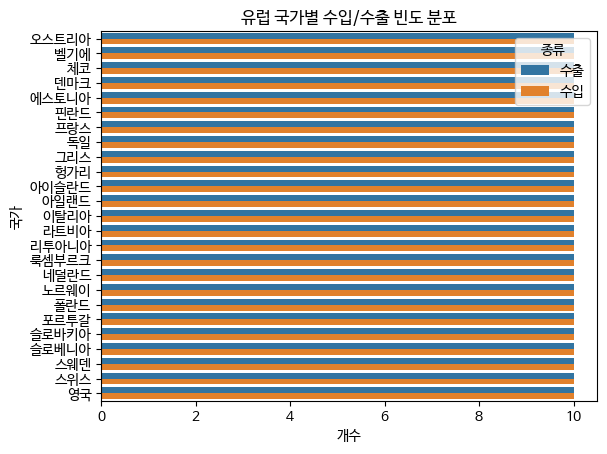

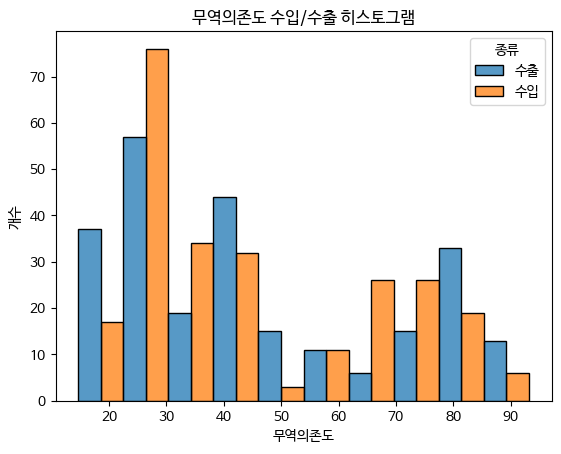

,val
count,250.000000
mean,45.424080
std,23.205469
min,14.580000
25%,26.912500
50%,39.865000
75%,68.397500
max,92.880000


In [4]:
# 유럽 국가별 수입/수출 빈도 분포 시각화
# 유럽 국가마다 종류 (수입, 수출)에 관계 없이 10년간 (2012~2021년) 동안 균일하게 분포됨 (데이터 개수 = 10개)
dataL5 = dataL4.loc[(dataL4['특성'] == '원데이터')]

sns.countplot(y="국가", hue="종류", data=dataL5)
plt.title('유럽 국가별 수입/수출 빈도 분포')
plt.xlabel('개수')
plt.show()

# 무역의존도 수입/수출 히스토그램 시각화
# 무역의존도 수입은 17.03 ~ 93.22 (평균 45.29)으로 나타내는 반면 수출에서는 보다 넓게 14.58 ~ 92.88 (평균 45.42)로 분포함
# 특히 수입 및 수출은 무역의존도 25 부근에 높은 빈도를 보임
sns.histplot(x='val', hue='종류', data=dataL5, multiple='dodge')
plt.title('무역의존도 수입/수출 히스토그램')
plt.xlabel('무역의존도')
plt.ylabel('개수')
plt.show()

# 수입/수출에 따른 요약 통계량
dataL5.loc[(dataL5['종류'] == '수입')].describe()
dataL5.loc[(dataL5['종류'] == '수출')].describe()

# 세부 목표1. 유럽 국가별 무역의존도 비교 분석
## 유럽 국가별 무역의존도 비교 분석 시각화
- 특정 국가 (벨기에, 슬로바키아)의 경우 수출 및 수입의 무역의존도가 둘다 높은 반면 일부 국가 (체코, 라트비아 등)은 하나만 의존 (수출 또는 수입) 경향을 보임
- 이는 벨기에 및 슬로바키아는 유럽연합 회원국으로서 EU 시장과 긴밀한 관계를 유지하고 특히 벨기는 유럽 내에서 중요한 국제 물류 및 운송의 중심지 역할을 수행함

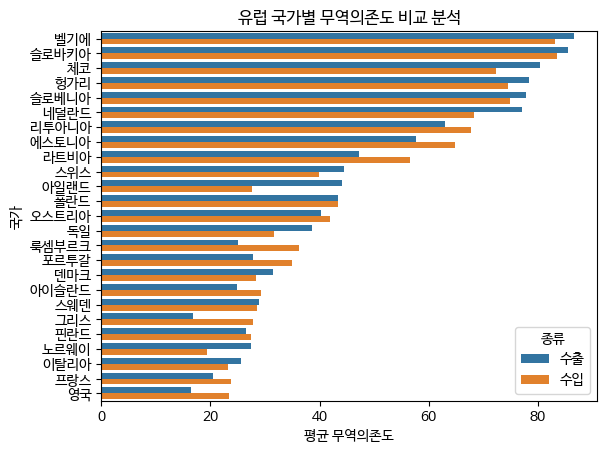

In [5]:
# 유럽 국가별 무역의존도 비교 분석 시각화
# 특정 국가 (벨기에, 슬로바키아)의 경우 수출 및 수입의 무역의존도가 둘다 높은 반면 일부 국가 (체코, 라트비아 등)은 하나만 의존 (수출 또는 수입) 경향을 보임
# 이는 벨기에 및 슬로바키아는 유럽연합 회원국으로서 EU 시장과 긴밀한 관계를 유지하고 특히 벨기는 유럽 내에서 중요한 국제 물류 및 운송의 중심지 역할을 수행함
dataL5 =  dataL4.loc[(dataL4['특성'] == '원데이터')]

statDataL1 = dataL5.groupby(['국가', '종류'])['val'].mean().reset_index(drop=False)
statDataL2 = statDataL1.sort_values('val', ascending=False)

sns.barplot(x='val', y='국가', hue='종류', data=statDataL2)
plt.title('유럽 국가별 무역의존도 비교 분석')
plt.xlabel('평균 무역의존도')
# plt.ylabel('국가')
plt.show()

# 세부 목표2. 유럽 시기별(수출) 무역의존도 추이 분석
# 세부 목표3. 유럽 시기별(수입) 무역의존도 추이 분석
## 유럽 시기별 수출입 무역의존도 추이 분석 시각화
- 10년간 (2019~2020년) 수출입 무역의존도는 연도에 따라 다양한 변화 패턴을 보임

- 즉 2012-2015년은 일정한 감소 경향을 보이며 2016~2018년까지 증가 경향 보임
- 당시 2009~2012년 유로존 재정 위기의 여파로 인해 경기 침체와 더불어 무역의존도에도 부정적인 영향을 끼침
- 그러나 유럽중앙은행의 통화 완하 정책을 통해 경제 회복 및 무역의존도에 긍정적인 영향을 미침

- 또한 2018~2020년까지 급격히 감소하였으나 2021년에는 폭발적으로 증가하여 2012년과 유사한 분포를 보임
- 미중국의 무역전쟁을 비롯한 COVID-19 팬데믹 피크 기간 (2019년 12월 01일 ~ 현재)과 같은 겹치면서 전세계 무역 흐름 중단 및 부정적인 영향을 줌
- 팬데믹 이후 백신의 보급돠 함께 국가 간 무역 제한 조치 완하되면서 그동안 쌓인 수요 폭발적으로 급증함

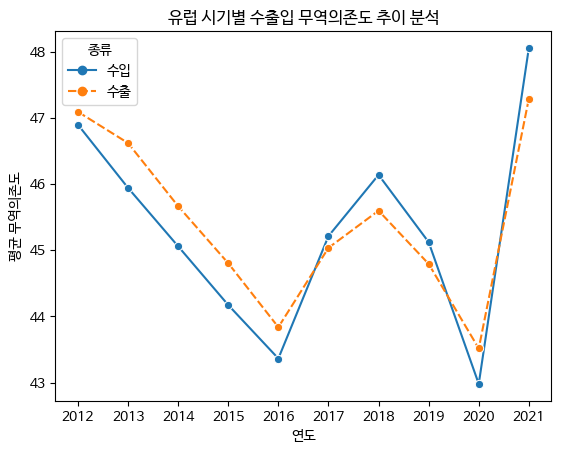

In [6]:
# 유럽 시기별 수출입 무역의존도 추이 분석 시각화
# 10년간 (2019~2020년) 수출입 무역의존도는 연도에 따라 다양한 변화 패턴을 보임

# 즉 2012~2015년은 일정한 감소 경향을 보이며 2016~2018년까지 증가 경향 보임
# 당시 2009~2012년 유로존 재정 위기의 여파로 인해 경기 침체와 더불어 무역의존도에도 부정적인 영향을 끼침
# 그러나 유럽중앙은행의 통화 완하 정책을 통해 경제 회복 및 무역의존도에 긍정적인 영향을 미침

# 또한 2018~2020년까지 급격히 감소하였으나 2021년에는 폭발적으로 증가하여 2012년과 유사한 분포를 보임
# 미중국의 무역전쟁을 비롯한 COVID-19 팬데믹 피크 기간 (2019년 12월 01일 ~ 현재)과 같은 겹치면서 전세계 무역 흐름 중단 및 부정적인 영향을 줌
# 팬데믹 이후 백신의 보급돠 함께 국가 간 무역 제한 조치 완하되면서 그동안 쌓인 수요 폭발적으로 급증함
dataL5 = dataL4.loc[(dataL4['특성'] == '원데이터')]

statDataL1 = dataL5.groupby(['연도', '종류'])['val'].mean().reset_index(drop=False)
statDataL2 = statDataL1.sort_values('연도', ascending=True)

sns.lineplot(x='연도', y='val', hue='종류', style="종류", markers=['o', 'o'], data=statDataL2)
plt.title('유럽 시기별 수출입 무역의존도 추이 분석')
plt.xlabel('연도')
plt.ylabel('평균 무역의존도')
plt.show()